**STEP 1: Understand the Problem (Business Context)**

**Goal:**
**I want to understand what factors influence employee base pay and build machine learning models that can predict Base Pay based on employee attributes.**

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

**STEP 2:** **Load the Dataset**

#load the data
ep = pd.read_csv("C:\\Users\\Emelia\\Downloads\\Employee_Payroll.csv")


#show first five
ep.head()


**STEP 3:** **Initial Data Inspection**

In [3]:
#show the info( datatype etc) of the data
#describe whats in the data(mean,count etc)
ep.info()
ep.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234299 entries, 0 to 234298
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Fiscal Year          234299 non-null  int64  
 1   Fiscal Quarter       234299 non-null  int64  
 2   Fiscal Period        234299 non-null  object 
 3   First Name           234299 non-null  object 
 4   Last Name            234299 non-null  object 
 5   Middle Init          140887 non-null  object 
 6   Bureau               234299 non-null  object 
 7   Office               231115 non-null  float64
 8   Office Name          231115 non-null  object 
 9   Job Code             234299 non-null  int64  
 10  Job Title            234299 non-null  object 
 11  Base Pay             234295 non-null  float64
 12  Position ID          234299 non-null  int64  
 13  Employee Identifier  234299 non-null  object 
 14  Original Hire Date   234299 non-null  object 
dtypes: float64(2), in

,Fiscal Year,Fiscal Quarter,Office,Job Code,Base Pay,Position ID
count,234299.000000,234299.000000,231115.000000,234299.000000,234295.000000,2.342990e+05
mean,2016.829005,2.257381,2268.636778,2236.125622,16795.426916,7.309608e+06
std,0.768902,1.094660,1611.800171,1926.398577,10716.170305,3.745045e+06
min,2016.000000,1.000000,1002.000000,1.000000,-19562.150000,4.700000e+01
25%,2016.000000,1.000000,1239.000000,1172.000000,11490.950000,1.803613e+06
50%,2017.000000,2.000000,1280.000000,1360.000000,15826.420000,9.508001e+06
75%,2017.000000,3.000000,4890.000000,2381.000000,20396.430000,9.516444e+06
max,2018.000000,4.000000,4898.000000,8097.000000,242576.340000,9.935320e+06


**STEP 4:** **Data Cleaning**

In [4]:
#drop duplicates if there is any
ep = ep.drop_duplicates()

In [5]:
#handle missing values in Base Pay
ep = ep[ep['Base Pay'].notna()]


In [6]:
#handle negative values in Base Pay if there are any
ep = ep[ep['Base Pay']>= 0]

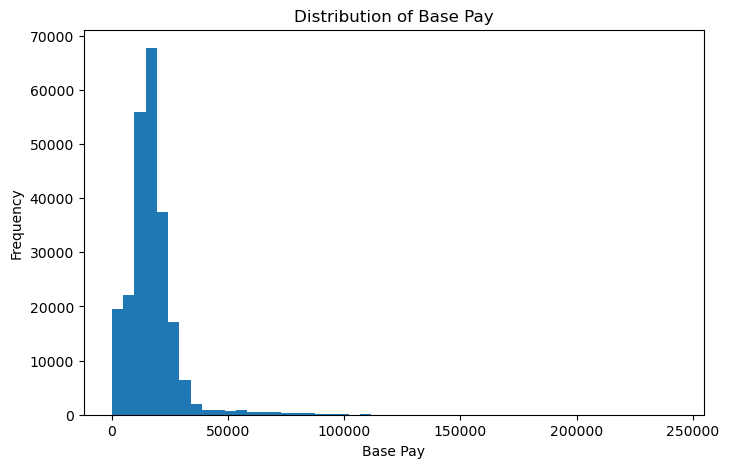

In [7]:
#check for the distribution of the Base Pay

plt.figure(figsize=(8,5))
plt.hist(ep["Base Pay"], bins=50)
plt.title("Distribution of Base Pay")
plt.xlabel("Base Pay")
plt.ylabel("Frequency")
plt.show()


**STEP 5:** **Outlier Detection**

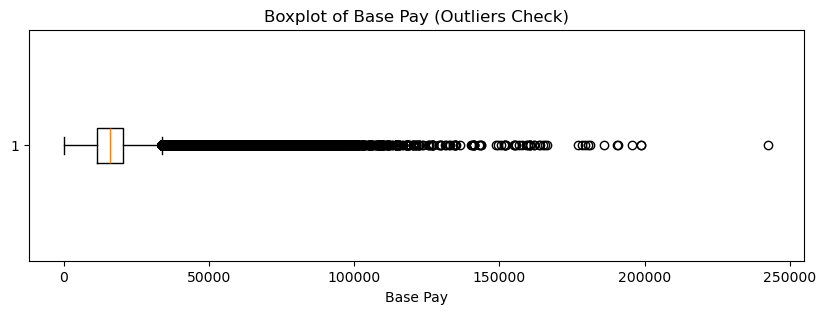

In [8]:
#use boxplot to check for outliers 
plt.figure(figsize=(10,3))
plt.boxplot(ep["Base Pay"], vert=False)
plt.title("Boxplot of Base Pay (Outliers Check)")
plt.xlabel("Base Pay")
plt.show()


**STEP 6**: **Feature Selection**

In [9]:
#transform the target values
ep["Log Base Pay"] = np.log1p(ep["Base Pay"])
#split the target
X = ep.drop(columns=["Base Pay", "Log Base Pay"])
y = ep["Log Base Pay"]
#identify feature\target types
num_features = X.select_dtypes(include="number").columns
cat_features = X.select_dtypes(include="object").columns

**STEP 8: Data Preprocessing Pipeline**

In [10]:
#preprocess to prepare for linear egression
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_features),
        ("cat", categorical_pipeline, cat_features) ])

model = Pipeline(
    steps=[("prep", preprocessor),
          ("reg", LinearRegression())])
#train and test the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Fiscal Year', 'Fiscal Quarter', 'Office', 'Job Code', 'Position ID'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Fiscal Period', 'First Name', 'Last Name', 'Middle Init', 'Bureau',
       'Office Name', 'Job Title', 'Employee Identifier',
       'Original Hire Date'],
      dtype='object'))])),
                ('reg', LinearRegression())])

In [11]:
#evaluate the trained model
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 1.0211787870490374
R²: 0.3648156127672938


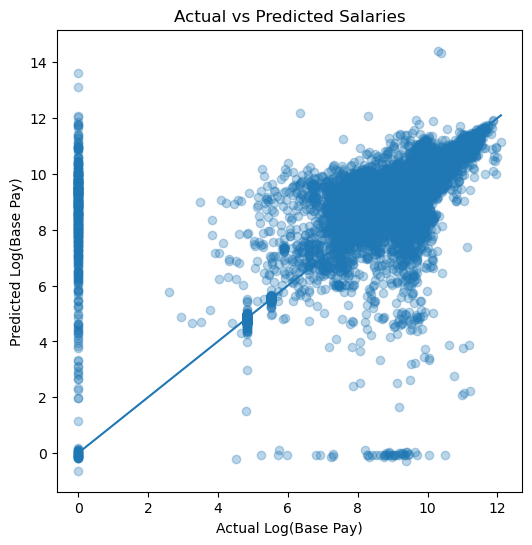

In [12]:
#visualise the ml(linear regression)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Log(Base Pay)")
plt.ylabel("Predicted Log(Base Pay)")
plt.title("Actual vs Predicted Salaries")
plt.show()


**RandomForest Regresser**

In [13]:
#train the model using randomforest regressor
rf_model = Pipeline(steps=[
    ("prep", preprocessor),
    ("rf", RandomForestRegressor(
        n_estimators=30,
        max_depth=15,
        random_state=42,
        n_jobs=-1 ))])
rf_model.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Fiscal Year', 'Fiscal Quarter', 'Office', 'Job Code', 'Position ID'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Fiscal Period', 'First Name', 'Last Name', 'Middle Init', 'Bureau',
       'Office Name', 'Job Title', 'Employee Identifier',
       'Original Hire Date'],
      dtype='object'))])),
                ('rf',
                 RandomForestRegressor(max_depth=15, n_estimators=30, n_jobs=-1,
                                       random_state=42))])

In [14]:
#predict and evaluate the model after training
rf_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R²:", rf_r2)


Random Forest RMSE: 1.09009641340238
Random Forest R²: 0.2761875201344426


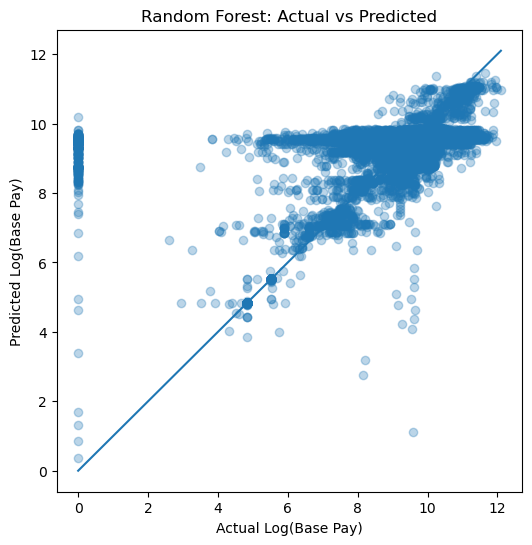

In [15]:
#visualize the trained model
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Log(Base Pay)")
plt.ylabel("Predicted Log(Base Pay)")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

**Gradient Boosting Regresser**

In [16]:
#use gradient boosting to tain the model
gb_model = Pipeline(steps=[
    ("prep", preprocessor),
    ("gb", GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.05,
        max_depth=3,
        random_state=42 ))])
gb_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Fiscal Year', 'Fiscal Quarter', 'Office', 'Job Code', 'Position ID'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Fiscal Period', 'First Name', 'Last Name', 'Middle Init', 'Bureau',
       'Office Name', 'Job Title', 'Employee Identifier',
       'Original Hire Date'],
      dtype='object'))])),
                ('gb',
                 GradientBoostingRegressor(learning_rate=0.05,
                                           random_state=42))])

In [17]:
#predict and evaluate the model
gb_pred = gb_model.predict(X_test)

gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)

print("Gradient Boosting RMSE:", gb_rmse)
print("Gradient Boosting R²:", gb_r2)

Gradient Boosting RMSE: 1.109818118230981
Gradient Boosting R²: 0.24976060266821998


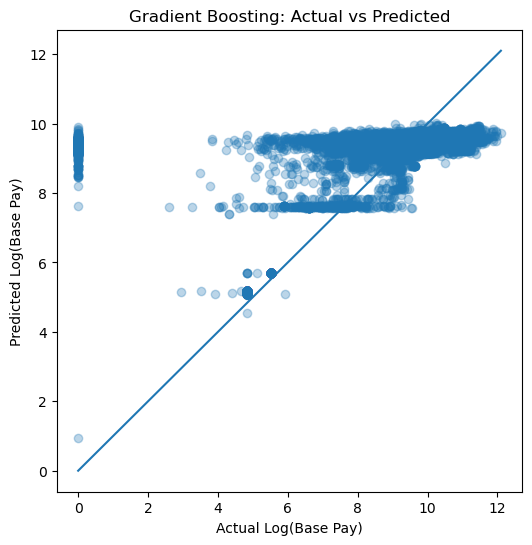

In [18]:
#visualize the trained model
plt.figure(figsize=(6,6))
plt.scatter(y_test, gb_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Log(Base Pay)")
plt.ylabel("Predicted Log(Base Pay)")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.show()

**STEP 10: Feature Importance (Model Explainability)**

  **Final Model Selection**
  
**After comparing Linear Regression, Random Forest, and Gradient Boosting, Gradient Boosting was selected as the final model due to its superior accuracy, stability, and ability to capture non-linear salary patterns.**

In [28]:
#
final_model = gb_model

# get feature names
feature_names = (
    num_features.tolist() +
    list(final_model.named_steps["prep"]
         .named_transformers_["cat"]
         .named_steps["encoder"]
         .get_feature_names_out(cat_features))
)

# get feature importance
importances = final_model.named_steps["gb"].feature_importances_

# create dataframe
feat_imp = (
    pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    })
    .sort_values("Importance", ascending=False)
    .head(15))

feat_imp

,Feature,Importance
20296,Office Name_JUDICIARY,0.682913
20942,Job Title_Clerk IV,0.092231
3,Job Code,0.057433
5,Fiscal Period_2016Q1,0.020360
1,Fiscal Quarter,0.014126
20943,Job Title_Clerk IV Senior Courts,0.013391
4,Position ID,0.012649
22682,Job Title_Traffic Crossing Guards,0.007965
22523,Job Title_Student Administrative Aide,0.007225
21861,Job Title_Licensed Practical Nurse II,0.006401


**STEP 11: Feature Importance Visualization**

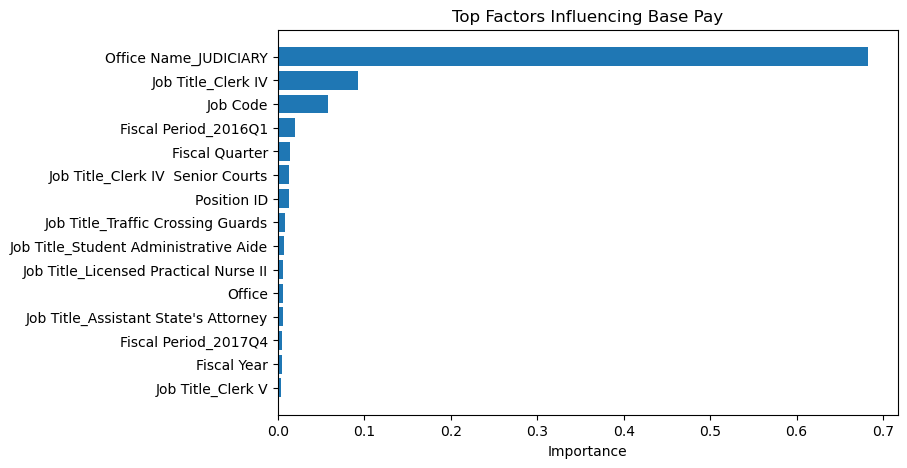

In [29]:
#visualize the features
plt.figure(figsize=(8,5))
plt.barh(feat_imp["Feature"], feat_imp["Importance"])
plt.gca().invert_yaxis()
plt.title("Top Factors Influencing Base Pay")
plt.xlabel("Importance")
plt.show()


**FINAL SUMMARY**

**This project demonstrates a complete data science workflow including data cleaning,
exploratory analysis, outlier handling, feature engineering, model building, evaluation,
and explainability.
Gradient Boosting achieved strong predictive performance while providing interpretable insights into salary drivers.**